In [1]:
import pandas as pd

In [2]:
def Average(dat):
    return sum(dat) / len(dat)

In [3]:
#Data Output ID3
dat_id3 = pd.read_excel('output_ID3.xlsx')
akurasi_id3 = dat_id3["Akurasi"]
presisi_id3 = dat_id3["Presisi"]
recall_id3 = dat_id3["Recall"]
ratAkurasi_ID3 = round(Average(akurasi_id3), 2)
ratPresisi_ID3 = round(Average(presisi_id3), 2)
ratRecall_ID3 = round(Average(recall_id3), 2)

#Data Output C45
dat_c45 = pd.read_excel('output_c45.xlsx')
akurasi_c45 = dat_c45["Akurasi"]
presisi_c45 = dat_c45["Presisi"]
recall_c45 = dat_c45["Recall"]
ratAkurasi_C45 = round(Average(akurasi_c45), 2)
ratPresisi_C45 = round(Average(presisi_c45), 2)
ratRecall_C45 = round(Average(recall_c45), 2)

#Data Output ID3 Bagging
bagAk = pd.read_excel("bagging_akurasi.xlsx")
bagPr = pd.read_excel("bagging_presisi.xlsx")
bagRe = pd.read_excel("bagging_recall.xlsx")
bag_hasil_akhir = pd.read_excel("bangging_hasil_akhir.xlsx")
ratAkurasi_bagging = [bag_hasil_akhir['k:'+str(i)][0] for i in  range(2,bag_hasil_akhir.shape[1]+1)]
ratPresisi_bagging = [bag_hasil_akhir['k:'+str(i)][1] for i in  range(2,bag_hasil_akhir.shape[1]+1)]
ratRecall_bagging = [bag_hasil_akhir['k:'+str(i)][2] for i in  range(2,bag_hasil_akhir.shape[1]+1)]
maxAkurasi_Bagging = max(ratAkurasi_bagging)
maxPresisi_Bagging = max(ratPresisi_bagging)
maxRecall_Bagging = max(ratRecall_bagging)

# print('Data ID3')
# print(dat_id3,'\n')
# print('Data C45')
# print(dat_c45,'\n')
print('Data ID3 Bagging')
print(bag_hasil_akhir)

Data ID3 Bagging
  Unnamed: 0    k:2    k:3    k:4    k:5    k:6    k:7    k:8    k:9   k:10  \
0    Akurasi  71.23  73.45  74.23  74.49  73.97  74.62  74.88  76.06  75.40   
1    Presisi  59.49  62.47  64.29  63.69  64.26  64.23  65.37  66.95  66.28   
2     Recall  57.51  59.04  61.27  63.14  59.77  62.04  61.28  62.78  62.02   

    k:11   k:12   k:13   k:14   k:15  
0  75.40  75.80  74.61  76.84  75.54  
1  65.80  67.00  65.13  68.05  65.83  
2  62.34  62.42  60.87  64.64  62.41  


In [4]:
def tabelPerbandinganMetode():
    dat = []

    dat.append(["Akurasi",ratAkurasi_ID3, maxAkurasi_Bagging, ratAkurasi_C45])
    dat.append(["Presisi",ratPresisi_ID3, maxPresisi_Bagging, ratPresisi_C45])
    dat.append(["Recall",ratRecall_ID3, maxRecall_Bagging, ratRecall_C45])
    
    dat2 = pd.DataFrame(dat, columns=['Keterangan', 'ID3', 'ID3 Bagging', 'C45'])

    return dat2

PerbandinganMetode = tabelPerbandinganMetode()
print(PerbandinganMetode)

  Keterangan    ID3  ID3 Bagging    C45
0    Akurasi  74.89        76.84  80.87
1    Presisi  63.26        68.05  69.65
2     Recall  67.99        64.64  80.26


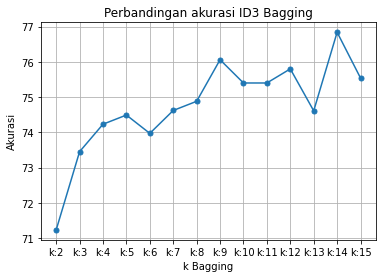

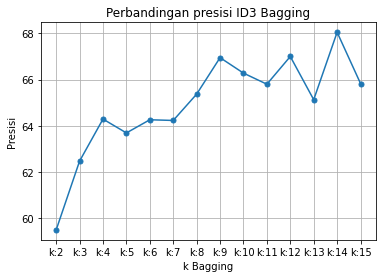

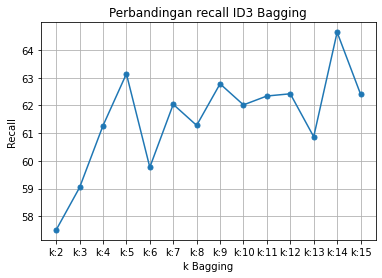

In [5]:
import matplotlib.pyplot as plt

k = [('k:'+str(i)) for i in range(2,16)]

def bagging_akurasi() :
    plt.plot(k, ratAkurasi_bagging, label='Akurasi', marker='o',  markersize=5)

    plt.xlabel('k Bagging')
    plt.ylabel('Akurasi')
    plt.title('Perbandingan akurasi ID3 Bagging')

    plt.grid()
    plt.show()

def bagging_presisi() :
    plt.plot(k, ratPresisi_bagging, label='Presisi', marker='o',  markersize=5)

    plt.xlabel('k Bagging')
    plt.ylabel('Presisi')
    plt.title('Perbandingan presisi ID3 Bagging')

    plt.grid()
    plt.show()

def bagging_recall() :
    plt.plot(k, ratRecall_bagging, label='Recall', marker='o',  markersize=5)

    plt.xlabel('k Bagging')
    plt.ylabel('Recall')
    plt.title('Perbandingan recall ID3 Bagging')

    plt.grid()
    plt.show()

bagging_akurasi()
bagging_presisi()
bagging_recall()

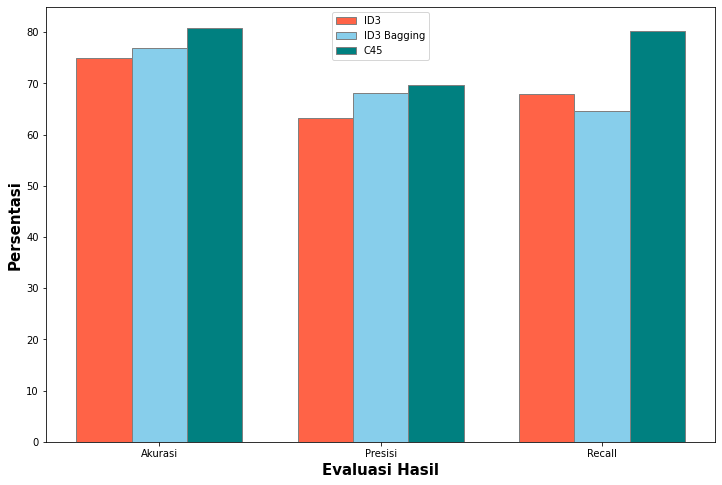

In [6]:
import numpy as np

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
label = ['ID3', 'ID3 Bagging', 'C45']
# Akurasi = [PerbandinganMetode[label[i]][0] for i in range(len(label))]
ID3_Single = PerbandinganMetode['ID3']
ID3_Bagging = PerbandinganMetode['ID3 Bagging']
C45_Single = PerbandinganMetode['C45']
 
# Set position of bar on X axis
br1 = np.arange(len(ID3_Single))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, ID3_Single, color ='tomato', width = barWidth,edgecolor ='grey', label ='ID3')
plt.bar(br2, ID3_Bagging, color ='skyblue', width = barWidth,edgecolor ='grey', label ='ID3 Bagging')
plt.bar(br3, C45_Single, color ='teal', width = barWidth,edgecolor ='grey', label ='C45')
 
# Adding Xticks
plt.xlabel('Evaluasi Hasil', fontweight ='bold', fontsize = 15)
plt.ylabel('Persentasi', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(ID3_Single))],['Akurasi', 'Presisi', 'Recall'])

plt.legend()
plt.show()